In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import time
import sys
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore')

## Functions

In [3]:

def setup_m(ax):
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.add_feature(cfeature.COASTLINE)
    t1 = ax.gridlines(draw_labels=True)
    t1.xlabels_top = False
    t1.ylabels_right = False

    return ax

########################################################################
########################################################################
def plot_the_track(m,record,col,leg,lab_on,msize,sym,transform):

## initialize arrays and assign data
    nn = np.shape(record)[0]
    x = np.zeros(nn)
    y = np.zeros(nn)
    w = np.zeros(nn)
    for i in np.arange(nn):
        y[i]=record[i]["lat"]
        x[i]=record[i]["lon"]
        w[i]=record[i]["wind"]

## remove the tail if it cross prime merdian (0E)
    for i in np.arange(nn):
        if (x[i]-x[i-1]) < -250.:
            newnn = i
            break
        else:
            newnn = 0

    if sym == tys:
       fill = 'none'
    else:
       fill = 'full'


    if lab_on:
        if newnn != 0:
            m.plot(x[0:newnn],y[0:newnn],label=leg,marker=sym,color=col,markeredgecolor=col,fillstyle=fill, linewidth=1.5, markersize=msize, markeredgewidth=1.5,transform=transform)
        else:
            m.plot(x,y,label=leg,marker=sym,color=col,markeredgecolor=col, fillstyle=fill,linewidth=1.5,markersize=msize,markeredgewidth=1.5,transform=transform)
    else:
        if newnn != 0:
            m.plot(x[0:newnn],y[0:newnn],marker=sym,color=col,markeredgecolor=col,fillstyle=fill,linewidth=1.5,markersize=msize, markeredgewidth=1.5,transform=transform)
        else:
            m.plot(x,y,marker=sym,color=col,markeredgecolor=col,fillstyle=fill,linewidth=1.5,markersize=msize,markeredgewidth=1.5,transform=transform)

#     m.legend(loc='upper right',frameon=True)
########################################################################
########################################################################
def get_hurricane():
    u = np.array([  [2.444,7.553],
                    [0.513,7.046],
                    [-1.243,5.433],
                    [-2.353,2.975],
                    [-2.578,0.092],
                    [-2.075,-1.795],
                    [-0.336,-2.870],
                    [2.609,-2.016]  ])
    u[:,0] -= 0.098
    codes = [1] + [2]*(len(u)-2) + [2] 
    u = np.append(u, -u[::-1], axis=0)
    codes += codes

    return mpath.Path(3*u, codes, closed=False)


## Input variables

In [17]:
basin = 'NAtl'
# case = '06' # irma
# ini_times = [
# # '2017082700','2017082712', # 27 not included in irma!!!!
# '2017082800','2017082812',
# '2017082900','2017082912',
# '2017083000','2017083012',
# '2017083100','2017083112',
# '2017090100','2017090112',
# '2017090200','2017090212',
# '2017090300','2017090312',
# '2017090400','2017090412',
# '2017090500','2017090512',
# '2017090600','2017090612',
# '2017090700','2017090712',
# '2017090800','2017090812',
# '2017090900','2017090912',
# '2017091000','2017091012',
# '2017091100','2017091112',
# '2017091200','2017091212',
# ]



case = '10' # maria
ini_times = [ 
# '2017091400','2017091412',
# '2017091500','2017091512',
# '2017091600','2017091612',
'2017091700'
#     ,'2017091712',
# '2017091800','2017091812',
# '2017091900','2017091912',
# '2017092000','2017092012',
# '2017092100','2017092112',
# '2017092200','2017092212',
# '2017092300','2017092312',
# '2017092400','2017092412',
# '2017092500','2017092512',
# '2017092600','2017092612',
# '2017092700','2017092712',
# '2017092800','2017092812',
# '2017092900','2017092912',
# '2017093000','2017093012'
]


#models = [ 'gfdl_gfs', 'gfs']
#models = [ 'gfdl2', 'dwd2', 'ec_oper','ukmo']
#models = [ 'gfdl2', 'dwd2', 'ec_oper', 'meteofrance2', 'gfs', 'gfsic' ]
#models = [ 'gfdl2', 'dwd2', 'ec_oper', 'he2f','meteofrance2','cmc2' ]

outfile_dir = '/home/Tyler.Barbero/tmp'
match_file_dir_root = [ \
                    '/archive/jhc/NGGPS/NCEP_fore/Analysis/TC/2017hurr/match/',                                      \
                    '/archive/jhc/DATA/EC_IFS_fore/20170801_20171031_from_Linus/Analysis/TC/match/',                 \
                    '/archive/jhc/fvGFS_201806/fvgfs_201806b_test/2017hurr_gfsIC/Analysis/TC/match/',                \
                    '/archive/jhc/fvGFS_201806/fvgfs_201806b_test/2017hurr_ifsIC/Analysis/TC/match/',                \
                  ]

tag = "comp_ntu"
exps = [ 'GFS', 'IFS', 'SHiELD_gfsic', 'SHiELD_ifsic' ]
#exps = [ 'SHiELD', 'ICON','IFS', 'UM', 'ARPEGE','GFS', 'SHiELD_gfsic' ]
#exps = [ 'SHiELD', 'ICON','IFS','IFS_47r1','ARPEGE','CMC' ]

# cols = ['r','b','g','y','orange','m','cyan','olive','indigo','gray','saddlebrown','teal']
cols = ['b','g','y','r']


## Main Function

Plotting for  bal15_MARIA
Init Time:  2017091700
Reading model:  /archive/jhc/NGGPS/NCEP_fore/Analysis/TC/2017hurr/match/2017.NAtl.10.txt
Reading model:  /archive/jhc/DATA/EC_IFS_fore/20170801_20171031_from_Linus/Analysis/TC/match/2017.NAtl.10.txt
Reading model:  /archive/jhc/fvGFS_201806/fvgfs_201806b_test/2017hurr_gfsIC/Analysis/TC/match/2017.NAtl.10.txt
Reading model:  /archive/jhc/fvGFS_201806/fvgfs_201806b_test/2017hurr_ifsIC/Analysis/TC/match/2017.NAtl.10.txt


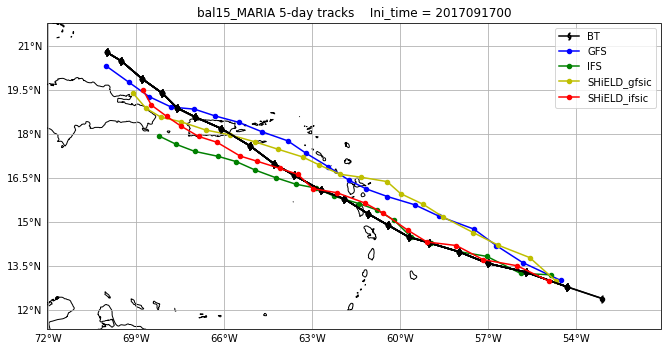

In [19]:
tys = get_hurricane()
transform = ccrs.PlateCarree()

# get TC's name with basin number for the year
TC_names_file = "/home/Jan-Huey.Chen/Util/BT/2017_hurr_only/"+basin+'_name.txt'

tcn = open (TC_names_file, "r")
TC_names = []
lines = tcn.readlines()
for line in lines:
    TC_name = str(line[3:20])
    TC_names.append(TC_name.strip())
storm_order =  int(case) -1
TC_name = TC_names[storm_order]

print("Plotting for ",TC_name)


for it in ini_times:
    # setup figure
    fig = plt.figure(figsize=(11,8))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    m = setup_m(ax)

    lat_list = []
    lon_list = []
    
    print("Init Time: ", it)

    ecount = 0
    for model in match_file_dir_root:

        exp = exps[ecount]
        col = cols[ecount]
        ecount = ecount + 1

        filename = model + "2017." + basin + "." + case + ".txt"
        
        print("Reading model: ", filename)
        fo = open (filename, "r")

        lines = fo.readlines()
        record_obs = []
        record_obs_overlap = []
        record_model = []
        # for printing dates
        record_model_dates = []
        record_model_lats = []
        record_model_lons = []
        record_obs_dates = []
        record_obs_lats = []
        record_obs_lons = []
        

        counter = 0


        for line in lines:
            counter = counter + 1
            if counter != 1:
            # If counter is not first line of txt file, do below

                if "+++" in line:      # if header line, get save_title
                    data = line.split()
                    storm_num = str(data[0][0:5])
                    save_title = str(data[1])
                    if save_title == "overlap_BT_for":
                        ini_time = str(data[2])

                    if np.size(record_obs) > 1 and model == match_file_dir_root[0]: # 2nd part legend BT once
                        for i in range(0,len(record_obs[bt_i:bt_f])):
                            lat_list.append(record_obs[bt_i:bt_f][i]['lat'])
                            lon_list.append(record_obs[bt_i:bt_f][i]['lon'])
                        plot_the_track(m,record_obs[bt_i:bt_f],'k','BT',True,7,tys,transform)
                        plot_the_track(m,record_obs[bt_i:bt_f],'k','BT',False,4,'o',transform)
                        record_obs = []
                    if np.size(record_obs_overlap) > 1 :
                        for i in range(0,len(record_obs_overlap[0:20])):
                            lat_list.append(record_obs_overlap[0:20][i]['lat'])
                            lon_list.append(record_obs_overlap[0:20][i]['lon'])
                        plot_the_track(m,record_obs_overlap[0:20],'k','BT',False,7,tys,transform)
                        plot_the_track(m,record_obs_overlap[0:20],'k','BT',False,4,'o',transform)
                        record_obs_overlap = []
#                         for i in range(0,20,4):
#                             j=0.5
#                             plt.text(record_obs_lons[i]-0.4,record_obs_lats[i]-j,record_obs_dates[i],transform=ccrs.PlateCarree(),color='k',size='small')
                        record_obs_dates = []
                        record_obs_lats = []
                        record_obs_lons = []
                        
                    if np.size(record_model) > 1:
                        for i in range(0,len(record_model[0:20])):
                            lat_list.append(record_model[0:20][i]['lat'])
                            lon_list.append(record_model[0:20][i]['lon'])
                        
                        if model == match_file_dir_root[1]:
                            plot_the_track(m,record_model[1:20],col,exp,True,4,'o',transform)
                        else:
                             plot_the_track(m,record_model[0:20],col,exp,True,4,'o',transform)

#                         for i in range(0,20,4):
#                             j=0.5
#                             plt.text(record_model_lons[i]-0.4,record_model_lats[i]+j,record_model_dates[i],transform=ccrs.PlateCarree(),color=col,size='small')
                        record_model = []
                        record_model_dates = []
                        record_model_lats = []
                        record_model_lons = []

                else:

                    if save_title == "full_BT": # if save_title == full_BT, go through all lines below and get data

                         data = line.split()
                         time = int(data[0])
                         lon = float(data[1])
                         lat = float(data[2])
                         pres = float(data[3])
                         wind = float(data[4])
                         
                         item = {}

                         item["time"] = time
                         item["lat"] = lat
                         item["lon"] = lon
                         item["wind"] = wind
                         item["pres"] = pres
                         
                        # save index where BT == ini_time
                         if int(time) == int(it):
                                bt_i = int(np.shape(record_obs)[0])
                                bt_f = bt_i+20
                                
                    if save_title == "overlap_BT_for":
                        if ini_time == it:              ### only get data for ini_time!!!
                            #ini_time = time in lines file in 2017.NAtl.10
                            data = line.split()
                            time = int(data[0])
                            lon = float(data[1])
                            lat = float(data[2])
                            pres = float(data[3])
                            wind = float(data[4])

                            item = {}

                            item["time"] = time
                            item["lat"] = lat
                            item["lon"] = lon
                            item["wind"] = wind
                            item["pres"] = pres
                            record_obs_overlap.append(item)
                            record_obs.append(item)
                            record_obs_lons.append(lon)
                            record_obs_lats.append(lat)
                            tmp = str(item['time'])[6:]
                            record_obs_dates.append(int(tmp))
                            
                    if save_title == "forecast":
                        if ini_time == it:             ### only get data for ini_time!!!
                            data = line.split()
                            time = int(data[0])
                            lon = float(data[1])
                            lat = float(data[2])
                            pres = float(data[3])
                            wind = float(data[4])

                            item = {}

                            item["time"] = time
                            item["lat"] = lat
                            item["lon"] = lon
                            item["wind"] = wind
                            item["pres"] = pres
                            record_model.append(item)
                            tmp = str(item['time'])[6:]
                            record_model_dates.append(int(tmp))
                            record_model_lats.append(lat)
                            record_model_lons.append(lon)
                            
        if np.size(record_model) > 1:
            plot_the_track(m,record_model,col,exp,True,4,'o',transform)
            print(np.shape(record_model))
            print(record_model)
#             record_model = []

        lat_min = min(lat_list)-1
        lat_max = max(lat_list)+1
        lon_min = min(lon_list)-2
        lon_max = max(lon_list)+2
        m.set_extent([lon_min,lon_max,lat_min,lat_max],crs=ccrs.PlateCarree())
        fo.close # close file with lines
        
        title = TC_name + ' 5-day tracks    Ini_time = ' + it
        m.set_title(title)
        m.legend(loc ='upper right')
# BT plots at 00/12 because ini_times ending is 00/12. but model data plots 
# 06 hr init time after actual init time

    plt.show()
    outfile_name = outfile_dir + '/'+ basin+ '_' + TC_name+ '_'+ it + '_' +tag+'.png'
    fig.patch.set_facecolor('white')
    fig.savefig(outfile_name,dpi=900,orientation='landscape',bbox_inches='tight')
    plt.close(fig)

In [51]:
lat

33.45